## Import all required libraries

In [20]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split #for data splitting
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix #for model evaluation
from sklearn.metrics import accuracy_score
from pdpbox import pdp, get_dataset, info_plots
from sklearn.tree import export_graphviz #plot tree
import eli5
from eli5.sklearn import PermutationImportance
import graphviz
os.environ["PATH"] += os.pathsep + 'C:\\Program Files (x86)\\Graphviz2.38\\bin'

Using TensorFlow backend.


## Get heart disease data from UI website and convert it into training and testing set

In [15]:
url='http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
df = pd.read_csv(url,sep= ',', header = None)
columns_name = ['age', 'sex', 'chest_pain_type', 'resting_bp', 'cholesterol', 'fasting_bld_sugar', 'rest_ecg', 'max_hrtrte_ach'
              ,'exer_indc_angina', 'st_depression', 'st_slope','no_mjr_vssels', 'thalassemia', 'target']
df.columns=columns_name
df['target'] = df.target.map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})
df = df.replace({'?':np.NaN})
df.dropna(inplace=True)
X_train, X_test, y_train, y_test = train_test_split(df.drop('target', 1), df['target'], test_size = .2, random_state=10) #split the data
feature_names = [i for i in X_train.columns]
print(columns_name)
columns_name.remove('target')
X=df[columns_name]

['age', 'sex', 'chest_pain_type', 'resting_bp', 'cholesterol', 'fasting_bld_sugar', 'rest_ecg', 'max_hrtrte_ach', 'exer_indc_angina', 'st_depression', 'st_slope', 'no_mjr_vssels', 'thalassemia', 'target']


## Implementing Random Forest algorithm

In [3]:
rf_model = RandomForestClassifier(random_state=1)
rf_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

## Predicting output using RF algorithm

In [23]:
preds = rf_model.predict(X_test)

## Evaluating the Model's Performance

In [5]:
accuracy_score(y_test, preds)

0.8666666666666667

## Permutation Importance

In [21]:
perm = PermutationImportance(rf_model, random_state=1).fit(X_test,y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.0833 ± 0.0365,no_mjr_vssels
0.0300 ± 0.0327,st_depression
0.0233 ± 0.0340,thalassemia
0.0233 ± 0.0499,chest_pain_type
0.0200 ± 0.0133,max_hrtrte_ach
0.0167 ± 0.0211,resting_bp
0.0133 ± 0.0133,fasting_bld_sugar
0.0133 ± 0.0249,exer_indc_angina
0.0100 ± 0.0163,rest_ecg
0.0100 ± 0.0340,cholesterol


## Partial Dependence Plot 
 Resolve error using this link :- https://forums.fast.ai/t/pbpbox-error-on-pdp-interact-plot/28468

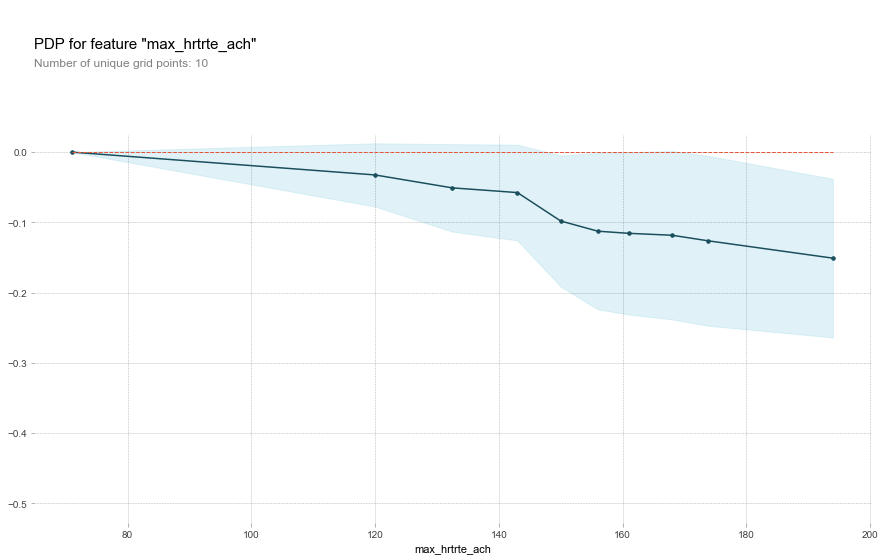

In [6]:
from matplotlib import pyplot as plt
from pdpbox import pdp, get_dataset, info_plots
# Create the data that we will plot
pdp_goals = pdp.pdp_isolate(model=rf_model, dataset=X_train, model_features=columns_name, feature='max_hrtrte_ach')
# plot it
pdp.pdp_plot(pdp_goals, 'max_hrtrte_ach')
plt.show()

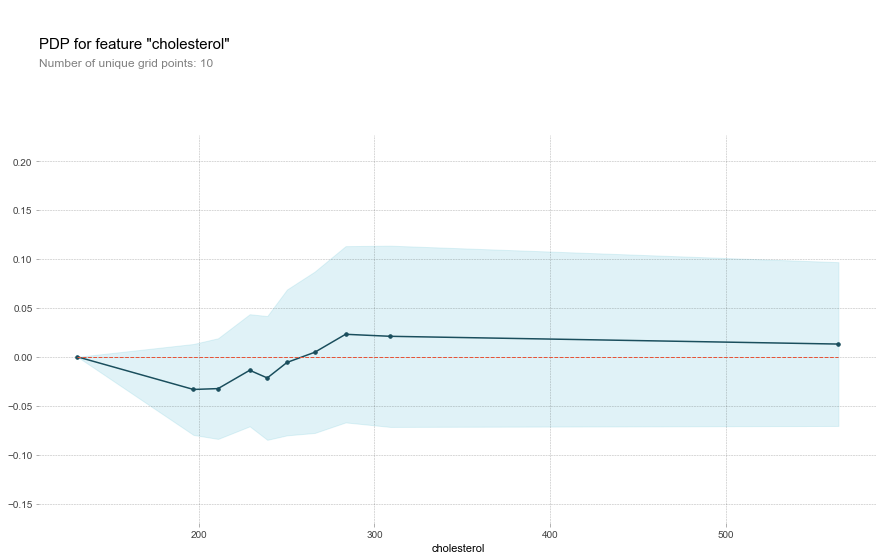

In [7]:
feature_to_plot = 'cholesterol'
pdp_dist = pdp.pdp_isolate(model=rf_model, dataset=X_train, model_features=columns_name, feature=feature_to_plot)

pdp.pdp_plot(pdp_dist, feature_to_plot)
plt.show()

## 2D Partial Dependence Plots

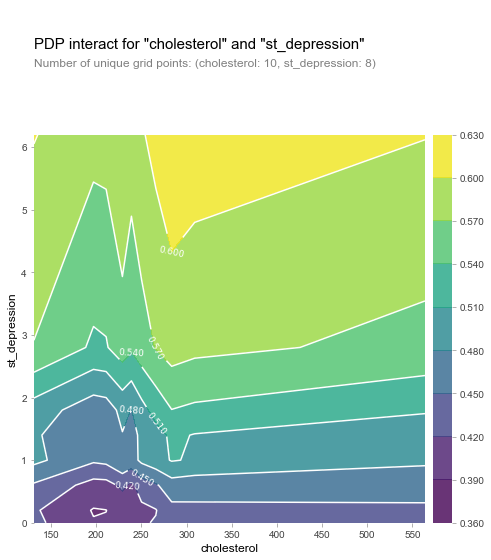

In [8]:
# Similar to previous PDP plot except we use pdp_interact instead of pdp_isolate and pdp_interact_plot instead of pdp_isolate_plot
features_to_plot = ['cholesterol', 'st_depression']
inter1  =  pdp.pdp_interact(model=rf_model, dataset=X_train, model_features=columns_name, features=features_to_plot)
pdp.pdp_interact_plot(pdp_interact_out=inter1, feature_names=features_to_plot, plot_type='contour')
plt.show()

## SHAP values
Install packeg using :- conda install -c conda-forge shap

In [9]:
row_to_show = 5
data_for_prediction = X_train.iloc[row_to_show]  # use 1 row of data here. Could use multiple rows if desired
data_for_prediction_array = data_for_prediction.values.reshape(1, -1)
rf_model.predict_proba(data_for_prediction_array)

array([[1., 0.]])

In [10]:
import shap  # package used to calculate Shap values
# Create object that can calculate shap values
explainer = shap.TreeExplainer(rf_model)
# Calculate Shap values
shap_values = explainer.shap_values(data_for_prediction)

In [11]:
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], data_for_prediction)

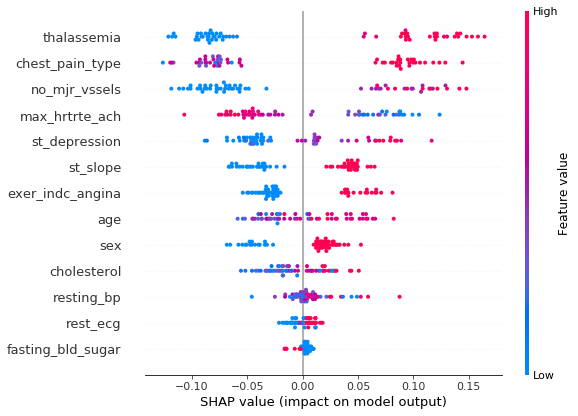

In [14]:
# Create object that can calculate shap values
explainer = shap.TreeExplainer(rf_model)
# calculate shap values. This is what we will plot.
# Calculate shap_values for all of val_X rather than a single row, to have more data for plot.
shap_values = explainer.shap_values(X_test)
# Make plot. Index of [1] is explained in text below.
shap.summary_plot(shap_values[1], X_test)

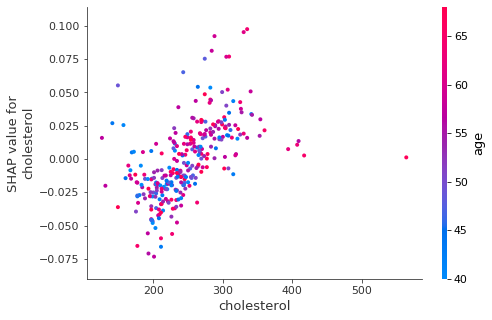

In [18]:
# Create object that can calculate shap values
explainer = shap.TreeExplainer(rf_model)
# calculate shap values. This is what we will plot.
shap_values = explainer.shap_values(X)
# make plot.
shap.dependence_plot('cholesterol', shap_values[1], X, interaction_index="age")

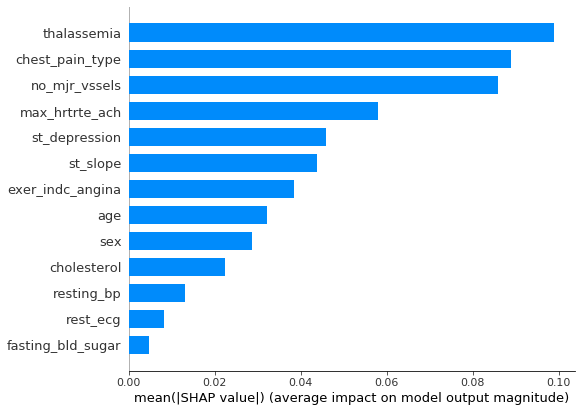

In [22]:
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values[1], X_test, plot_type="bar")